<center><h1>Complex Network Analysis Graph</h1></center>

<ul>
<li>Moad Boulahdoud</li>
<li>Master of Data Science</li>
<li>2019/2020</li>
</ul>
<hr />

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
import warnings; warnings.simplefilter('ignore')

# Social Network Basics

Each network consists of:<br /> 
<ul>
    <li>Nodes: The individuals whose network we are building.</li>
    <li>Edges: The connection between the nodes. It represents a relationship between the nodes of the network.</li>
</ul>

## Symmetric Networks (undirected)

The first network that we create is a group of people who work together. This is called a <b>symmetric network</b> because the relationship “working together” is a symmetric relationship: If A is related to B, B is also related to A.

In [41]:
G_symmetric = nx.Graph()

In [42]:
G_symmetric.add_edge('Mouad',  'Fatima')
G_symmetric.add_edge('Mouad',  'Tariq')
G_symmetric.add_edge('Mouad',  'Amina')
G_symmetric.add_edge('Mouad',  'Hassan')
G_symmetric.add_edge('Fatima',   'Hassan')
G_symmetric.add_edge('Hassan','Tariq')
G_symmetric.add_edge('Abdo',  'Amina')
G_symmetric.add_edge('Abdo',  'Mouad')

In [43]:
print(nx.info(G_symmetric))

Name: 
Type: Graph
Number of nodes: 6
Number of edges: 8
Average degree:   2.6667


Now we visualize the network with the <span style="color:red;">draw_networkx()</span> function.

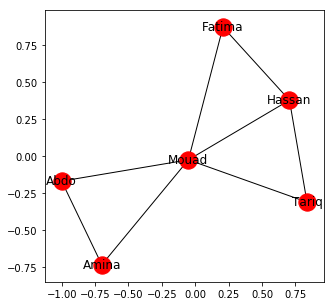

In [44]:
plt.figure(figsize=(5,5))
nx.draw_networkx(G_symmetric);

## Asymmetric Networks (directed)

What if the relationship between nodes is ‘child of’, then the relationship is no longer symmetric. This is the case if someone follows someone else on Twitter. Or in the case of hyperlinks.<br />
If A is the child of B, then B is not a child of A. Such a network where the relationship is asymmetric (A is related to B, does not necessarily means that B is associated with A) is called an Asymmetric network.

In [7]:
# We can build the asymmetric network in NetworkX using DiGraph method, which is short of Directional Graph.
G_asymmetric = nx.DiGraph()
G_asymmetric.add_edge('A','B')
G_asymmetric.add_edge('A','D')
G_asymmetric.add_edge('C','A')
G_asymmetric.add_edge('D','E')

To make sure that all nodes are distinctly visible in the network, we use the spring_layout() function, followed by the draw_networkx() function.

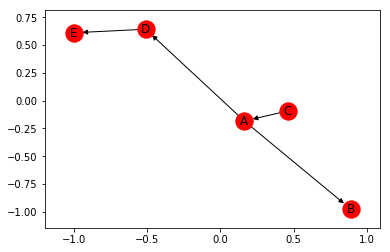

In [49]:
nx.spring_layout(G_asymmetric)
nx.draw_networkx(G_asymmetric)

## Weighted Networks

It is possible that networks are made with weights, for example, if in our initial network we consider the number of projects done together as a weight, we will get a weighted Network.


Let us make one again of the employees, but this time we add weight to the network, each edge has a weight signifying the number of projects they have done together.

In [50]:
G_weighted = nx.Graph()

In [89]:
G_weighted.add_edge('Mouad',  'Fatima',   weight=25)
G_weighted.add_edge('Mouad',  'Tariq',    weight=8)
G_weighted.add_edge('Mouad',  'Amina',    weight=11)
G_weighted.add_edge('Mouad',  'Hassan', weight=1)
G_weighted.add_edge('Fatima',   'Hassan',weight=1)
G_weighted.add_edge('Hassan','Tariq',    weight=1)
G_weighted.add_edge('Abdo',  'Amina',    weight=8)
G_weighted.add_edge('Abdo',  'Mouad',  weight=4)

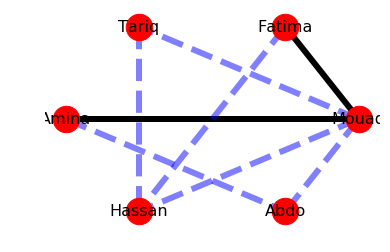

In [90]:
elarge = [(u, v) for (u, v, d) in G_weighted.edges(data=True) if d['weight'] > 8]
esmall = [(u, v) for (u, v, d) in G_weighted.edges(data=True) if d['weight'] <= 8]

pos = nx.circular_layout(G_weighted)  # positions for all nodes

# nodes
nx.draw_networkx_nodes(G_weighted, pos, node_size=700)

# edges
nx.draw_networkx_edges(G_weighted, pos, edgelist=elarge, width=6)
nx.draw_networkx_edges(G_weighted, pos, edgelist=esmall, width=6, alpha=0.5, edge_color='b', style='dashed')

# labels
nx.draw_networkx_labels(G_weighted, pos, font_size=16, font_family='sans-serif')

plt.axis('off')
plt.show();

# Network Distance Measures

## Degree

Degree of a node defines the number of connections a node has. NetworkX has the function degree which we can use to determine the degree of a node in the network.

In [86]:
nx.degree(G_symmetric, 'Hassan')

3

This will return a value of 3, as Hassan has worked with three employees in the network.


## Distance

We can also determine the shortest path between two nodes and its length in NetworkX using <b>nx.shortest_path(Graph, Node1, Node2)</b> and <b>nx.shortest_path_length(Graph, Node1, Node2)</b> functions respectively.

In [59]:
nx.shortest_path(G_symmetric, 'Hassan', 'Amina')


['Hassan', 'Mouad', 'Amina']

In [60]:
nx.shortest_path_length(G_symmetric, 'Hassan', 'Amina')

2

In [105]:
nx.dijkstra_path(G_symmetric, source='Hassan', target='Amina')

['Hassan', 'Mouad', 'Amina']

## Breadth-first search

We can find the distance of a node from every other node in the network using breadth-first search algorithm, starting from that node. networkX provides the function bfs_tree to do it.<br />
And so if you use <b style="color:red;">M = nx.bfs_tree(G_symmetric, 'Hassan')</b> and now draw this tree, we will get a network structure telling how we can reach other nodes of the network starting from Hassan .

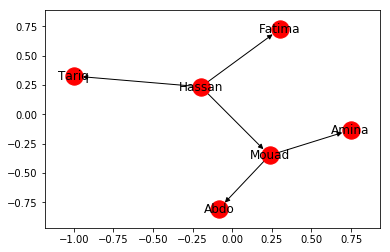

In [93]:
S = nx.bfs_tree(G_symmetric, 'Hassan')
nx.draw_networkx(S)

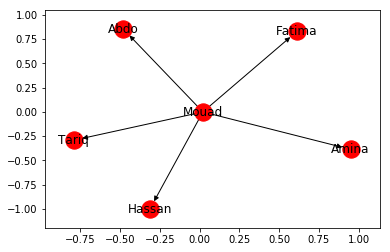

In [92]:
M = nx.bfs_tree(G_symmetric, 'Mouad')
nx.draw_networkx(M)

## Eccentricity

Eccentricity of a node A is defined as the largest distance between A and all other nodes.<br />
It can be found using <b style="color:red;">nx.eccentricity()</b> function. In the symmetric employee-network, Hassan has an eccentricity of 2, and Mouad has an eccentricity of 1 (he is connected to every other node).

In [71]:
nx.eccentricity(G_symmetric,'Hassan')

2

In [72]:
nx.eccentricity(G_symmetric,'Mouad')

1

## Degree Centrality

The people most popular or more liked usually are the ones who have more friends.<br />
Degree centrality is a measure of the number of connections a particular node has in the network. It is based on the fact that important nodes have many connections. NetworkX has the function <b style="color:red;">degree_centrality()</b> to calculate the degree centrality of all the nodes of a network.

In [73]:
nx.degree_centrality(G_symmetric)

{'Mouad': 1.0,
 'Fatima': 0.4,
 'Tariq': 0.4,
 'Amina': 0.4,
 'Hassan': 0.6000000000000001,
 'Abdo': 0.4}

## Eigenvector Centrality

It is not just how many individuals one is connected too, but the type of people one is connected with that can decide the importance of a node.<br>
Eigenvector centrality is a measure of how import a node is by accounting for the fact of how well it is connected to other important nodes.<br>
We can use the <b style="color:red;">eigenvector_centrality()</b> function of NetworkX to calculate eigenvector centrality of all the nodes in a network.<br>
The <a href="https://en.wikipedia.org/wiki/PageRank">Google’s Pagerank algorithm</a> is a variant of Eigenvector centrality algorithm.

In [74]:
nx.eigenvector_centrality(G_symmetric)

{'Mouad': 0.6006686104947806,
 'Fatima': 0.3545677660798074,
 'Tariq': 0.3545677660798074,
 'Amina': 0.30844592433424667,
 'Hassan': 0.4443904166426225,
 'Abdo': 0.30844592433424667}

## Closeness Centrality

Closeness Centrality is a measure where each node’s importance is determined by <b>closeness to all other nodes</b>.

In [75]:
nx.closeness_centrality(G_symmetric)

{'Mouad': 1.0,
 'Fatima': 0.625,
 'Tariq': 0.625,
 'Amina': 0.625,
 'Hassan': 0.7142857142857143,
 'Abdo': 0.625}

## Betweenness Centrality

The Betweenness Centrality is the centrality of control.

It represents the frequency at which a point occurs on the shortest paths that connected pair of points. It quantifies how many times a particular node comes in the shortest chosen path between two other nodes.

The nodes with high betweenness centrality play a significant role in the communication/information flow within the network.

The nodes with high betweenness centrality can have a strategic control and influence on others. An individual at such a strategic position can influence the whole group, by either withholding or coloring the information in transmission.

Networkx has the function <b style="color:red;">betweenness_centrality()</b> to measure it for the network. It has options to select if we want betweenness values to be normalized or not, weights to be included in centrality calculation or not, and to include the endpoints in the shortest path counts or not.

In [76]:
nx.betweenness_centrality(G_symmetric)

{'Mouad': 0.65,
 'Fatima': 0.0,
 'Tariq': 0.0,
 'Amina': 0.0,
 'Hassan': 0.05,
 'Abdo': 0.0}

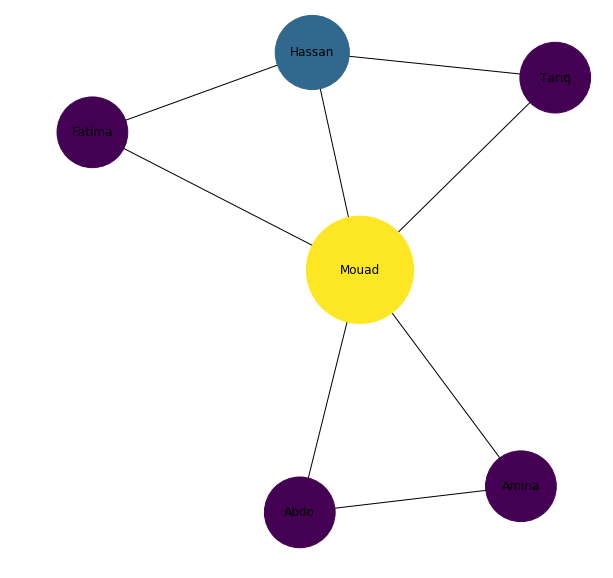

In [85]:
pos = nx.spring_layout(G_symmetric)
betCent = nx.betweenness_centrality(G_symmetric, normalized=True, endpoints=True)
node_color = [20000.0 * G_symmetric.degree(v) for v in G_symmetric]
node_size =  [v * 10000 for v in betCent.values()]
plt.figure(figsize=(10,10))
nx.draw_networkx(G_symmetric, pos=pos, with_labels=True,
                 node_color=node_color,
                 node_size=node_size )
plt.axis('off');

In [83]:
sorted(betCent, key=betCent.get, reverse=True)[:5]

['Mouad', 'Hassan', 'Fatima', 'Tariq', 'Amina']

# Case Study

Let us start with the Facebook data, for our analysis here we will use Facebook combined ego networks dataset, it contains the aggregated network of ten individuals’ Facebook friends list. You can download the required facebook_combined.txt file from the <a href="https://snap.stanford.edu/data/egonets-Facebook.html">Stanford University</a> site.<br>
This dataset consists of ‘circles’ (or ‘friends lists’) from Facebook. Facebook data was collected from survey participants using this Facebook app. The dataset includes node features (profiles), circles, and ego networks.

In [94]:
import pandas as pd

In [95]:
df = pd.read_csv('facebook_combined.txt')

In [96]:
df.shape


(88233, 1)

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88233 entries, 0 to 88232
Data columns (total 1 columns):
0 1    88233 non-null object
dtypes: object(1)
memory usage: 689.4+ KB


In [97]:
df.tail()

,0 1
88228,4026 4030
88229,4027 4031
88230,4027 4032
88231,4027 4038
88232,4031 4038


In [98]:
G_fb = nx.read_edgelist("facebook_combined.txt", create_using = nx.Graph(), nodetype=int)

In [100]:
print(nx.info(G_fb))


Name: 
Type: Graph
Number of nodes: 4039
Number of edges: 88234
Average degree:  43.6910


The network consists of 4,039 nodes, connected via 88,234 edges.



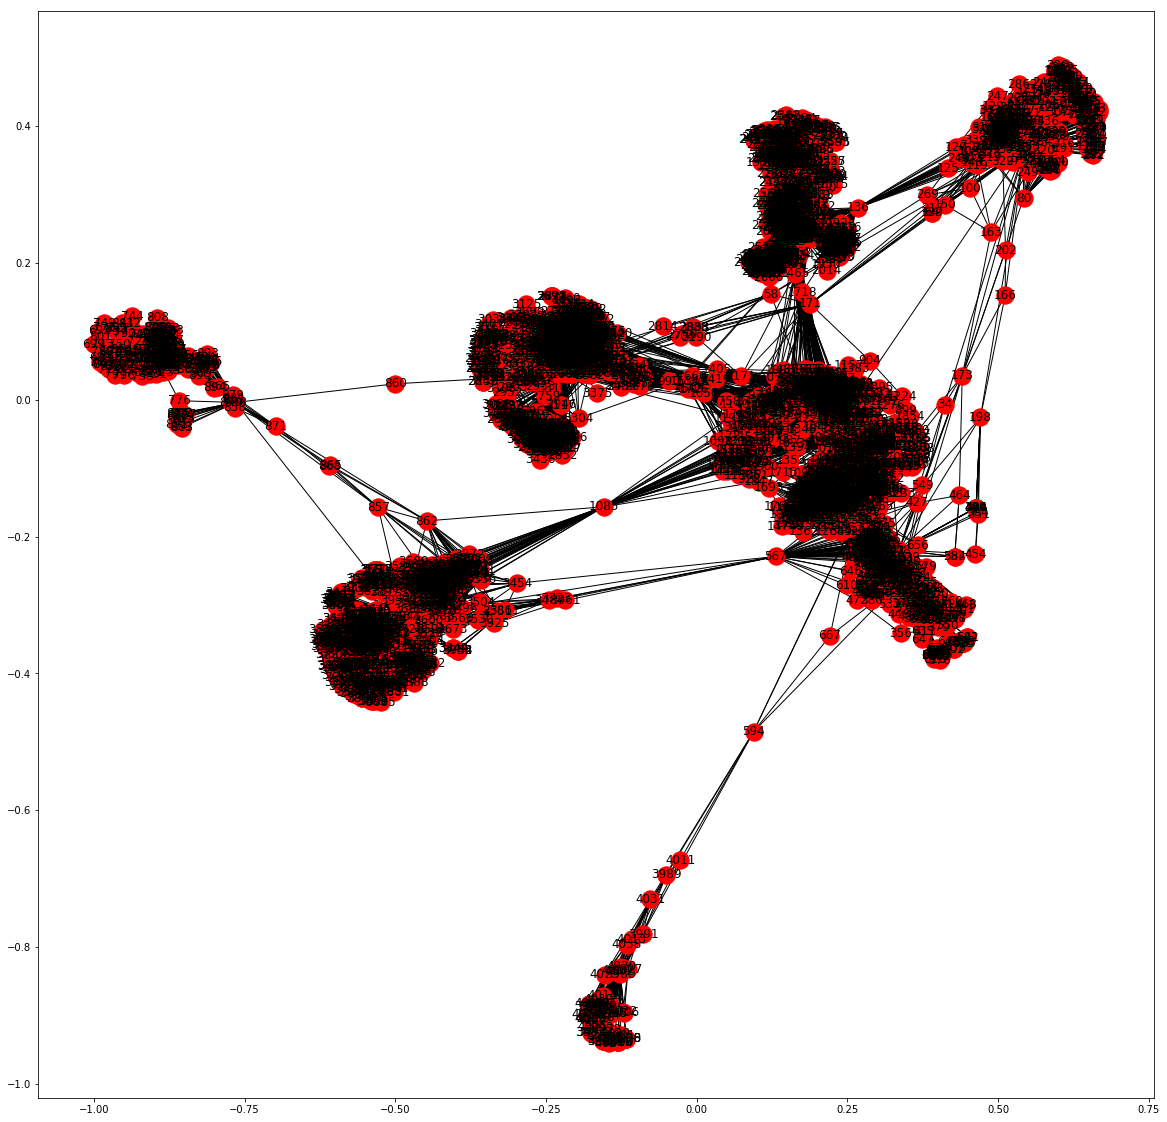

In [101]:
plt.figure(figsize=(20,20))
nx.draw_networkx(G_fb);

We can also visualize the network such that the node color varies with Degree and node size with Betweenness Centrality. The code to do this is:

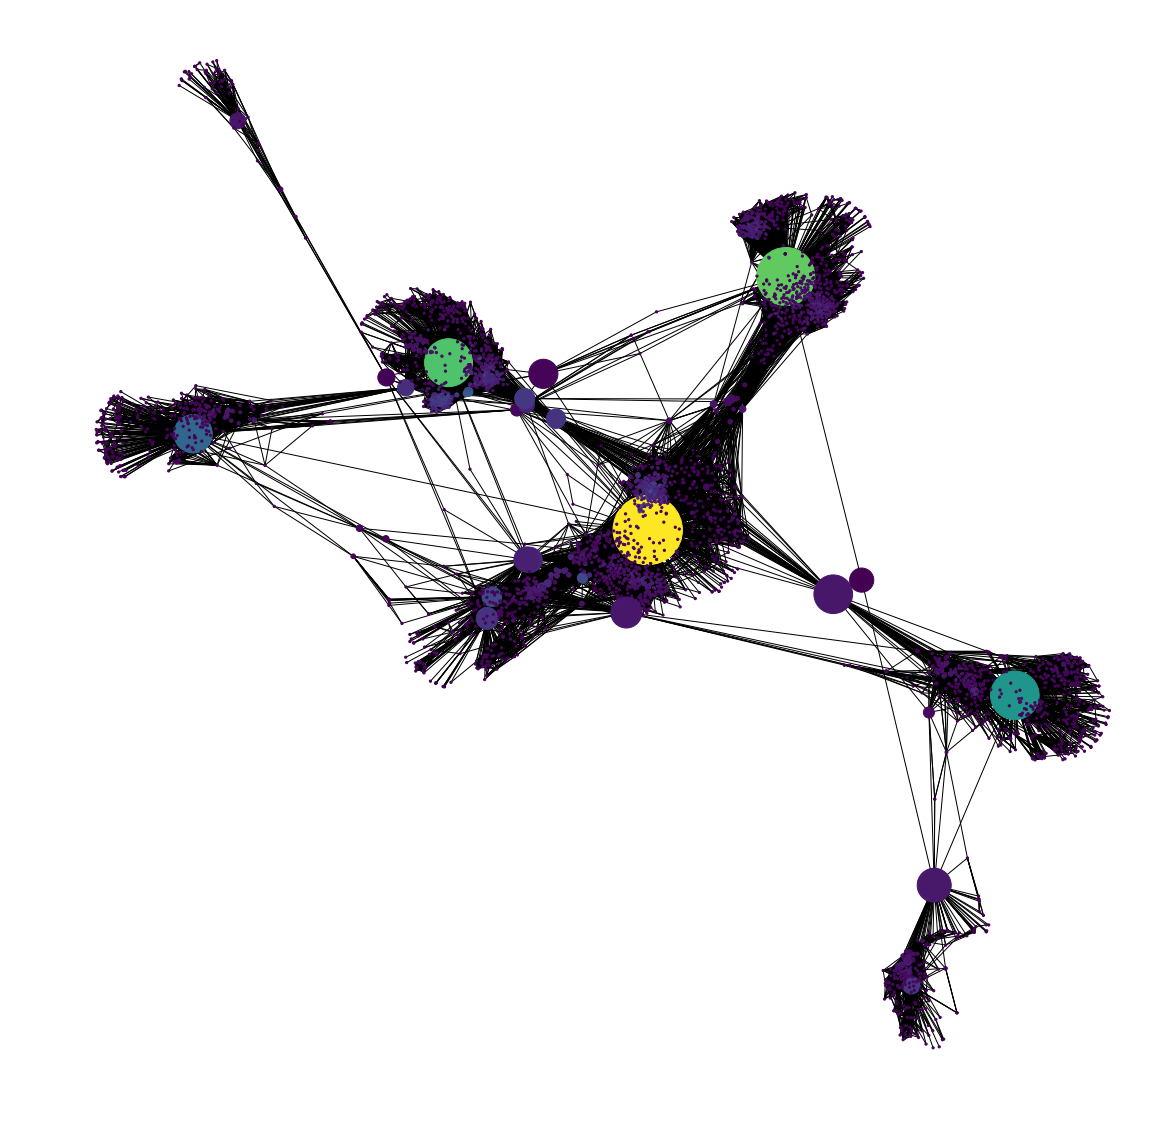

In [102]:
pos = nx.spring_layout(G_fb)
betCent = nx.betweenness_centrality(G_fb, normalized=True, endpoints=True)
node_color = [20000.0 * G_fb.degree(v) for v in G_fb]
node_size =  [v * 10000 for v in betCent.values()]
plt.figure(figsize=(20,20))
nx.draw_networkx(G_fb, pos=pos, with_labels=False,
                 node_color=node_color,
                 node_size=node_size )
plt.axis('off');

You can also know the labels of the nodes with the highest betweenness centrality using:



In [103]:
sorted(betCent, key=betCent.get, reverse=True)[:5]

[107, 1684, 3437, 1912, 1085]

We can see that some nodes are common between Degree Centrality, which is a measure of degree, and Betweenness Centrality which controls the information flow.

It is natural that nodes that are more connected also lie on shortest paths between other nodes. The node 1912 is an important node as it is crucial according to all three centrality measures that we had considered.